# Behavior of users who used Bay Wheels Ride in 2019
## by Clayton Coelho

## Investigation Overview

In this investigation, I want to look at the characteristics of the data collected on trips bikes from Bay Wheels Ride to map behavior patterns during the year 2019.

## Dataset Overview

Bay Wheels (previously known as Ford GoBike) is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.

See the original data [here](https://www.lyft.com/bikes/bay-wheels/system-data).

The final (cleaned) dataset has 2300000+ bike rides that happen in 2019 in the San Francisco Bay Area and has 11 columns to be explored. The dataset contained features about how long trip took, start/end datetime, start/end station name and users types. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_baywheels = pd.read_csv('./data/final/baywheels_final.csv')
df_baywheels.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,start_time_hour,end_time_hour,time_day_of_week,time_month,duration_minute
0,226,2019-01-01 00:07:10.576,2019-01-01 00:10:57.196,Downtown Berkeley BART,Fulton St at Bancroft Way,Customer,0,0,Tuesday,January,3.77
1,1767,2019-01-01 00:08:39.659,2019-01-01 00:38:06.848,Steuart St at Market St,Jackson Playground,Customer,0,0,Tuesday,January,29.45
2,182,2019-01-01 00:09:56.211,2019-01-01 00:12:58.748,Telegraph Ave at Carleton St,Haste St at Telegraph Ave,Subscriber,0,0,Tuesday,January,3.03
3,565,2019-01-01 00:11:03.441,2019-01-01 00:20:29.268,Telegraph Ave at Carleton St,Bancroft Way at College Ave,Subscriber,0,0,Tuesday,January,9.42
4,710,2019-01-01 00:14:48.398,2019-01-01 00:26:38.421,Lake Merritt BART Station,24th St at Market St,Customer,0,0,Tuesday,January,11.83


In [4]:
df_baywheels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359710 entries, 0 to 2359709
Data columns (total 11 columns):
 #   Column              Dtype  
---  ------              -----  
 0   duration_sec        int64  
 1   start_time          object 
 2   end_time            object 
 3   start_station_name  object 
 4   end_station_name    object 
 5   user_type           object 
 6   start_time_hour     int64  
 7   end_time_hour       int64  
 8   time_day_of_week    object 
 9   time_month          object 
 10  duration_minute     float64
dtypes: float64(1), int64(3), object(7)
memory usage: 198.0+ MB


In [5]:
# Set "time_week_type" as category type and ordered
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_classes = pd.api.types.CategoricalDtype(ordered = True, categories = day_of_week)
df_baywheels['time_day_of_week'] = df_baywheels['time_day_of_week'].astype(day_of_week_classes)

In [6]:
# Set "time_month" as category type and ordered
month_name = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_name_classes = pd.api.types.CategoricalDtype(ordered = True, categories = month_name)
df_baywheels['time_month'] = df_baywheels['time_month'].astype(month_name_classes)

## Distribution of Bike Rides duration in minutes

> The distribution of bike rides duration (minutes) shows that most trips are short between 5 and 10 minutes.

> Which gives us indications that the majority of users should use it to move between works, schools, subway stations and home.

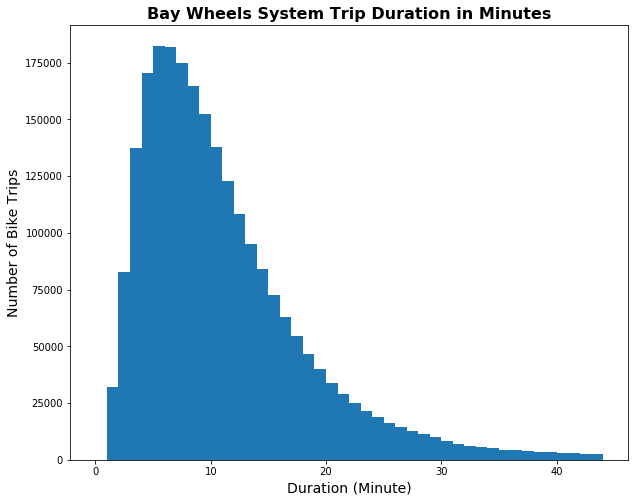

In [9]:
# Duration of the bike rides in minutes
plt.figure(figsize=(10, 8))
binsize = 1
bins = np.arange(0, df_baywheels['duration_minute'].max() + binsize, binsize)

plt.hist(data = df_baywheels, x = 'duration_minute', bins = bins);

plt.title("Bay Wheels System Trip Duration in Minutes", fontsize=16, fontweight='bold')
plt.xlabel('Duration (Minute)', fontsize=14)
plt.ylabel('Number of Bike Trips', fontsize=14);

## Percentage Distribution of Users Type.

>Here we see that more than 80% of the users who use the services are "Subscriber", while less than 20% are single customers.

>Here it shows that we have a good percentage of loyal customers.

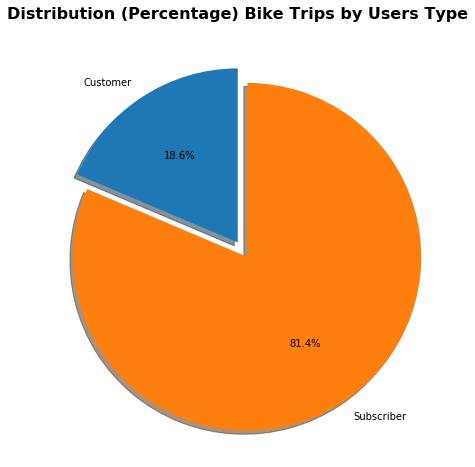

In [10]:
# Pie plot distribution by "user_type"
plt.figure(figsize=(10, 8))
plt.title("Distribution (Percentage) Bike Trips by Users Type", fontsize=16, fontweight='bold')
labels = ['Customer', 'Subscriber']
data = [(df_baywheels['user_type'].value_counts(normalize=True) * 100)['Customer'], (df_baywheels['user_type'].value_counts(normalize=True) * 100)['Subscriber']]

plt.pie(data, explode=(0, 0.1), labels = labels, autopct='%1.1f%%', shadow=True, startangle=90);

## Distribution the bike trips from Day of Week by User Type

> Here we note that "Subscriber" users are more active during weekdays than weekends, while "Customers" have little variation between weekdays and weekends.

> Reinforcing that we have a good part of the users using to move between works, schools, subway stations and home, mainly the users "Subscriber".

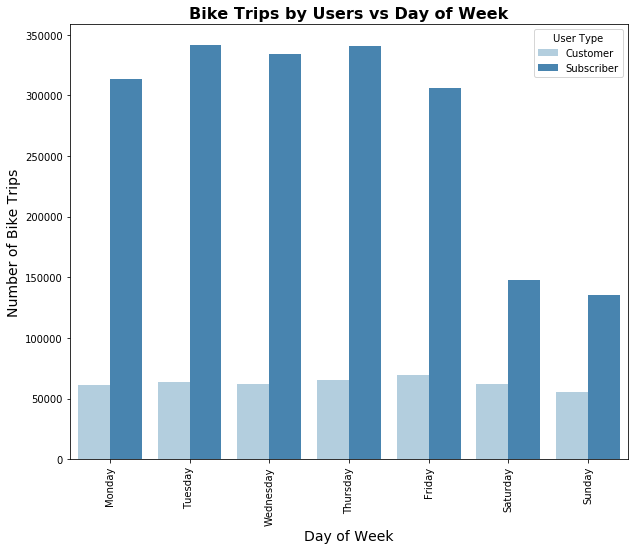

In [13]:
# Bivariate plots of "time_day_of_week" vs "user_type"
plt.figure(figsize=(10, 8))
ax = sb.countplot(data = df_baywheels, x = 'time_day_of_week', hue = 'user_type', palette = 'Blues')
ax.legend(title="User Type")
plt.xticks(rotation=90)
plt.title("Bike Trips by Users vs Day of Week", fontsize=16, fontweight='bold')
plt.xlabel('Day of Week', fontsize=14);
plt.ylabel('Number of Bike Trips', fontsize=14);

## Distribution the bike trips from Hours by User Type

> Here we notice the trend of increasing trips during the hours of 7 to 10 and from 16 to 20, mainly for "Subscriber" users. The "Customer" users follow the more discreet trend with more trips during the afternoon.

> Confirming that we have a standard behavior for users "Subscribers" for use the bike trips on business days and business hours, and "Customer" users use the service more for leisure.

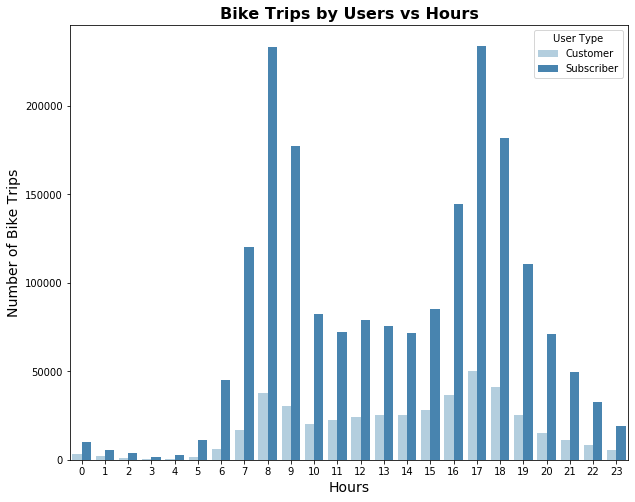

In [14]:
# Bivariate plots of "time_day_of_week" vs "user_type"
plt.figure(figsize=(10, 8))
ax = sb.countplot(data = df_baywheels, x = 'start_time_hour', hue = 'user_type', palette = 'Blues')
ax.legend(title="User Type")
plt.title("Bike Trips by Users vs Hours", fontsize=16, fontweight='bold')
plt.xlabel('Hours', fontsize=14);
plt.ylabel('Number of Bike Trips', fontsize=14);

## Statistics from Duration Trips by User Type

> We can see that "Customer" tend to take longer trips than "Subscriber" users, where it indicates that the usage behavior is for leisure use.

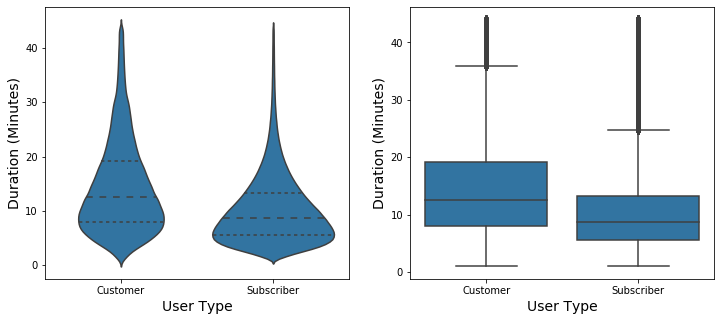

In [21]:
# Bivariate plots of "duration_minute" vs. "user_type"
base_color = sb.color_palette()[0]
plt.figure(figsize = [12, 5])

plt.subplot(1, 2, 1)
ax1 = sb.violinplot(data = df_baywheels, x = 'user_type', y = 'duration_minute', color = base_color, inner='quartile')
ax1.set_xlabel("User Type", fontsize=14)
ax1.set_ylabel("Duration (Minutes)", fontsize=14)

plt.subplot(1, 2, 2)
ax2 = sb.boxplot(data = df_baywheels, x = 'user_type', y = 'duration_minute', color = base_color)
ax2.set_xlabel("User Type", fontsize=14)
ax2.set_ylabel("Duration (Minutes)", fontsize=14);

## Average Trip Duration (Minutes) from Hours by User Type

> We noticed that the average trip duration of hourly, put the "Customer" with an increase in time during the afternoon hours, while the "Subscriber" has little variation during the day of business hours.

> The habit of trips varies a lot between "Subscriber" and "Customer". The "Subscriber" use the bike sharing system during work hours, so most trips took place on weekdays (Monday through Friday) and especially during peak hours (when you work in the morning and leave afternoon), while "Customers" usually have fun in the afternoon or on weekends.

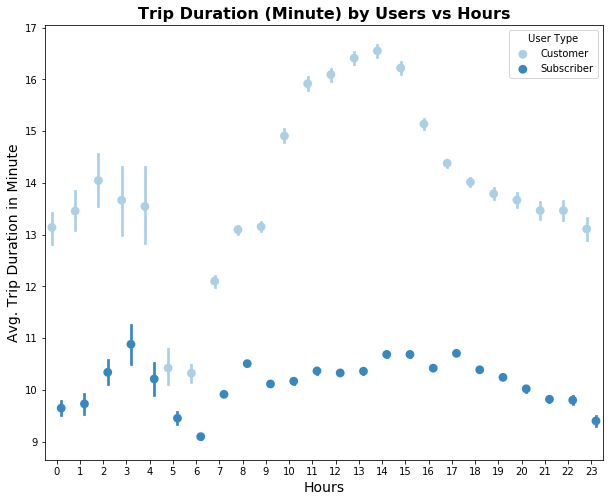

In [23]:
# Multivariate plots of Avg. Duration (minute) by "start_time_hour" vs "user_type"
fig = plt.figure(figsize=(10, 8))
ax = sb.pointplot(data = df_baywheels, x = 'start_time_hour', y = 'duration_minute', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
ax.legend(title="User Type")
plt.title('Trip Duration (Minute) by Users vs Hours', fontsize=16, fontweight='bold')
plt.ylabel('Avg. Trip Duration in Minute', fontsize=14)
plt.xlabel('Hours', fontsize=14);
ax.set_yticklabels([],minor = True)
plt.show();